# 서울시 요식업 평균 매출 예측 모델

필요한 라이브러리 import

In [1]:
# 기본적인 부분
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc("font", family="Malgun Gothic")
plt.rcParams["axes.unicode_minus"]=False

# 데이터 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures

# 학습 알고리즘
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report
from scipy.special import expit, softmax

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint, mstats
from sklearn.ensemble import RandomForestClassifier

## 데이터 로드 및 정제

### 서울시 추정매출 데이터

In [420]:
sales_df = pd.read_csv("../data/서울시 상권분석서비스(추정매출-상권).csv", encoding="cp949")

In [421]:
sales_df.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20241,U,관광특구,3001491,이태원 관광특구,CS100001,한식음식점,1.185751e+10,254192,6.640829e+09,...,69016,38472,129419,109336,1277,73116,86124,33511,28074,16652
1,20241,U,관광특구,3001491,이태원 관광특구,CS100002,중식음식점,1.911647e+09,46140,1.259317e+09,...,18085,4918,21479,21646,151,14443,15206,5918,4892,2514
2,20241,U,관광특구,3001491,이태원 관광특구,CS100003,일식음식점,7.273213e+08,10811,4.611840e+08,...,3596,2734,4855,4682,52,2911,3636,1345,1222,371
3,20241,U,관광특구,3001491,이태원 관광특구,CS100004,양식음식점,1.673468e+10,414722,8.256458e+09,...,135195,83964,228805,173511,3268,151680,156120,45901,31260,14074
4,20241,U,관광특구,3001491,이태원 관광특구,CS100005,제과점,1.255782e+09,96224,7.704259e+08,...,28562,8063,38105,54368,660,29740,28886,12736,12976,7472


In [422]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87179 entries, 0 to 87178
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준_년분기_코드        87179 non-null  int64  
 1   상권_구분_코드         87179 non-null  object 
 2   상권_구분_코드_명       87179 non-null  object 
 3   상권_코드            87179 non-null  int64  
 4   상권_코드_명          87179 non-null  object 
 5   서비스_업종_코드        87179 non-null  object 
 6   서비스_업종_코드_명      87179 non-null  object 
 7   당월_매출_금액         87179 non-null  float64
 8   당월_매출_건수         87179 non-null  int64  
 9   주중_매출_금액         87179 non-null  float64
 10  주말_매출_금액         87179 non-null  float64
 11  월요일_매출_금액        87179 non-null  float64
 12  화요일_매출_금액        87179 non-null  float64
 13  수요일_매출_금액        87179 non-null  float64
 14  목요일_매출_금액        87179 non-null  float64
 15  금요일_매출_금액        87179 non-null  float64
 16  토요일_매출_금액        87179 non-null  float64
 17  일요일_매출_금액   

In [423]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87179 entries, 0 to 87178
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준_년분기_코드        87179 non-null  int64  
 1   상권_구분_코드         87179 non-null  object 
 2   상권_구분_코드_명       87179 non-null  object 
 3   상권_코드            87179 non-null  int64  
 4   상권_코드_명          87179 non-null  object 
 5   서비스_업종_코드        87179 non-null  object 
 6   서비스_업종_코드_명      87179 non-null  object 
 7   당월_매출_금액         87179 non-null  float64
 8   당월_매출_건수         87179 non-null  int64  
 9   주중_매출_금액         87179 non-null  float64
 10  주말_매출_금액         87179 non-null  float64
 11  월요일_매출_금액        87179 non-null  float64
 12  화요일_매출_금액        87179 non-null  float64
 13  수요일_매출_금액        87179 non-null  float64
 14  목요일_매출_금액        87179 non-null  float64
 15  금요일_매출_금액        87179 non-null  float64
 16  토요일_매출_금액        87179 non-null  float64
 17  일요일_매출_금액   

In [424]:
seoul_restaurant_sales = sales_df[sales_df["서비스_업종_코드"].str.startswith("CS1")].copy()  # 요식업
seoul_etc_sales = sales_df[sales_df["서비스_업종_코드"].str.startswith("CS2")].copy()  # 기타서비스업
seoul_retail_sales = sales_df[sales_df["서비스_업종_코드"].str.startswith("CS3")].copy()  # 소매업

### 서울시 직장인구 데이터

In [425]:
work_df = pd.read_csv("../data/서울시 상권분석서비스(직장인구-상권).csv", encoding="cp949")

In [426]:
work_df.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,20241,U,관광특구,3001491,이태원 관광특구,28395,15935,12460,8,6830,...,4986,4313,3583,842,0,4627,4869,2052,722,190
1,20241,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,214604,123445,91159,396,43270,...,38123,36717,25448,6374,309,26574,33802,18817,8660,2997
2,20241,U,관광특구,3001493,동대문패션타운 관광특구,33474,16833,16641,273,9661,...,4972,3883,2050,1183,164,5025,3641,2930,3328,1553
3,20241,U,관광특구,3001494,종로?청계 관광특구,47296,26388,20908,670,9566,...,7326,7672,5302,1732,428,5452,6816,5204,2256,752
4,20241,U,관광특구,3001495,잠실 관광특구,111557,65817,45740,195,18343,...,18331,18070,13050,7197,115,9254,10943,10338,11338,3752


In [427]:
work_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6549 entries, 0 to 6548
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   기준_년분기_코드            6549 non-null   int64 
 1   상권_구분_코드             6549 non-null   object
 2   상권_구분_코드_명           6549 non-null   object
 3   상권_코드                6549 non-null   int64 
 4   상권_코드_명              6549 non-null   object
 5   총_직장_인구_수            6549 non-null   int64 
 6   남성_직장_인구_수           6549 non-null   int64 
 7   여성_직장_인구_수           6549 non-null   int64 
 8   연령대_10_직장_인구_수       6549 non-null   int64 
 9   연령대_20_직장_인구_수       6549 non-null   int64 
 10  연령대_30_직장_인구_수       6549 non-null   int64 
 11  연령대_40_직장_인구_수       6549 non-null   int64 
 12  연령대_50_직장_인구_수       6549 non-null   int64 
 13  연령대_60_이상_직장_인구_수    6549 non-null   int64 
 14  남성연령대_10_직장_인구_수     6549 non-null   int64 
 15  남성연령대_20_직장_인구_수     6549 non-null   int64 
 16  남성연령대_

### 서울시 유동인구 데이터

In [428]:
street_df = pd.read_csv("../data/서울시 상권분석서비스(길단위인구-상권).csv", encoding="cp949")

In [429]:
street_df.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,20241,U,관광특구,3001491,이태원 관광특구,2155176,1100997,1054179,140314,532219,...,320185,435781,276720,284230,272781,286789,286045,318414,368486,338431
1,20241,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,6889856,3343470,3546388,335824,1194547,...,1706632,1327800,343472,1040403,1133875,1202348,1130314,1103850,706014,573054
2,20241,U,관광특구,3001493,동대문패션타운 관광특구,3384560,1595828,1788732,188119,645950,...,524693,620807,401942,504854,524755,553766,540100,497858,381895,381333
3,20241,U,관광특구,3001494,종로?청계 관광특구,8440796,4496772,3944023,358062,1523184,...,1808704,1691285,660774,1258576,1328555,1410371,1345939,1334099,998247,765010
4,20241,U,관광특구,3001495,잠실 관광특구,4110178,1976808,2133370,434196,915211,...,653233,879474,477929,570999,570194,589977,580551,598178,621983,578294


In [430]:
street_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6595 entries, 0 to 6594
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   기준_년분기_코드         6595 non-null   int64 
 1   상권_구분_코드          6595 non-null   object
 2   상권_구분_코드_명        6595 non-null   object
 3   상권_코드             6595 non-null   int64 
 4   상권_코드_명           6595 non-null   object
 5   총_유동인구_수          6595 non-null   int64 
 6   남성_유동인구_수         6595 non-null   int64 
 7   여성_유동인구_수         6595 non-null   int64 
 8   연령대_10_유동인구_수     6595 non-null   int64 
 9   연령대_20_유동인구_수     6595 non-null   int64 
 10  연령대_30_유동인구_수     6595 non-null   int64 
 11  연령대_40_유동인구_수     6595 non-null   int64 
 12  연령대_50_유동인구_수     6595 non-null   int64 
 13  연령대_60_이상_유동인구_수  6595 non-null   int64 
 14  시간대_00_06_유동인구_수  6595 non-null   int64 
 15  시간대_06_11_유동인구_수  6595 non-null   int64 
 16  시간대_11_14_유동인구_수  6595 non-null   int64 
 17  시간대_14_17_유동인구

### 데이터 병합 및 컬럼 정리
> 서울시 추정매출 데이터: 년분기별 상권구분 별 상권별 서비스업종별 매출관련 컬럼들  
> 서울시 직장인구 데이터: 년분기별 상권구분 별 상권별 인구관련 컬럼들  
> 서울시 유동인구 데이터: 년분기별 상권구분 별 상권별 인구관련 컬럼들  

In [431]:
def marge_sales_data(df, category):
    df["서비스업종"] = category
    grouped = df.groupby(["상권_코드_명", "기준_년분기_코드"])[["당월_매출_금액", "월요일_매출_금액", "화요일_매출_금액",
                                                       "수요일_매출_금액", "목요일_매출_금액", "금요일_매출_금액",
                                                       "토요일_매출_금액", "일요일_매출_금액"]].mean().reset_index()
    grouped.rename(columns={"당월_매출_금액": "평균매출"}, inplace=True)
    
    # 인구 데이터 병합
    merged = pd.merge(grouped, street_df, on=["상권_코드_명", "기준_년분기_코드"], how="left")
    merged = pd.merge(merged, work_df, on=["상권_코드_명", "기준_년분기_코드"], how="left")
    merged["서비스업종"] = category
    return merged

# 서비스 업종별 + 데이터 병합
restaurant_merged = marge_sales_data(seoul_restaurant_sales, "요식업")
etc_merged = marge_sales_data(seoul_etc_sales, "기타서비스업")
retail_merged = marge_sales_data(seoul_retail_sales, "소매업")

final_df = pd.concat([restaurant_merged, etc_merged, retail_merged], ignore_index=True)

In [432]:
# 상권 구분 코드명 병합 전 중복 제거
if "상권_구분_코드_명" in final_df.columns:
    final_df = final_df.drop(columns=["상권_구분_코드_명"])

# 중복 값 제거
duplicate_drop = sales_df[["상권_코드_명", "상권_구분_코드_명"]].drop_duplicates()
final_df = pd.merge(final_df, duplicate_drop, on="상권_코드_명", how="left")

cols1 = ["기준_년분기_코드", "상권_구분_코드_명", "상권_코드_명", "서비스업종", "평균매출"]
cols2 = ["월요일_매출_금액", "화요일_매출_금액", "수요일_매출_금액",
                "목요일_매출_금액", "금요일_매출_금액", "토요일_매출_금액", "일요일_매출_금액"]
cols3 = []
for col in final_df.columns:
    if col not in cols1 + cols2 and "매출" not in col and "코드" not in col:
        cols3.append(col)

final_df = final_df[cols1 + cols2 + cols3]

In [433]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16682 entries, 0 to 16681
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   기준_년분기_코드            16682 non-null  int64  
 1   상권_구분_코드_명           16682 non-null  object 
 2   상권_코드_명              16682 non-null  object 
 3   서비스업종                16682 non-null  object 
 4   평균매출                 16682 non-null  float64
 5   월요일_매출_금액            16682 non-null  float64
 6   화요일_매출_금액            16682 non-null  float64
 7   수요일_매출_금액            16682 non-null  float64
 8   목요일_매출_금액            16682 non-null  float64
 9   금요일_매출_금액            16682 non-null  float64
 10  토요일_매출_금액            16682 non-null  float64
 11  일요일_매출_금액            16682 non-null  float64
 12  총_유동인구_수             16672 non-null  float64
 13  남성_유동인구_수            16672 non-null  float64
 14  여성_유동인구_수            16672 non-null  float64
 15  연령대_10_유동인구_수        16672 non-null 

In [434]:
final_df.to_csv("../data/상권_업종_인구_통합.csv", index=False, encoding="cp949")

In [435]:
final_df_copy=final_df.copy()

In [436]:
final_df_copy

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,서비스업종,평균매출,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,20241,골목상권,4.19민주묘지역 2번,요식업,5.791738e+08,7.595857e+07,6.386816e+07,8.260543e+07,5.811491e+07,8.225960e+07,...,4.0,12.0,30.0,61.0,0.0,4.0,4.0,9.0,12.0,28.0
1,20242,골목상권,4.19민주묘지역 2번,요식업,6.476178e+08,6.640149e+07,8.469500e+07,9.544292e+07,6.870253e+07,8.831480e+07,...,4.0,12.0,30.0,61.0,0.0,4.0,4.0,9.0,12.0,28.0
2,20243,골목상권,4.19민주묘지역 2번,요식업,5.785566e+08,5.557269e+07,7.413718e+07,7.940513e+07,5.871730e+07,7.947643e+07,...,4.0,12.0,30.0,61.0,0.0,4.0,4.0,9.0,12.0,28.0
3,20244,골목상권,4.19민주묘지역 2번,요식업,4.837946e+08,4.671709e+07,7.365159e+07,7.410768e+07,4.735737e+07,5.921922e+07,...,5.0,17.0,44.0,89.0,0.0,5.0,6.0,14.0,16.0,43.0
4,20241,발달상권,63빌딩,요식업,1.214889e+09,1.718305e+08,1.981513e+08,2.013047e+08,2.035040e+08,1.777674e+08,...,2053.0,1592.0,979.0,244.0,12.0,660.0,819.0,470.0,251.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16677,20244,골목상권,흑리단길,소매업,3.408189e+08,4.887332e+07,4.796151e+07,4.302464e+07,5.104847e+07,5.698426e+07,...,3.0,5.0,3.0,3.0,0.0,0.0,2.0,3.0,3.0,0.0
16678,20241,전통시장,흑석시장,소매업,2.397313e+08,3.922126e+07,2.143852e+07,3.372581e+07,3.495293e+07,4.755981e+07,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16679,20242,전통시장,흑석시장,소매업,1.805660e+08,2.340267e+07,2.958531e+07,2.407108e+07,3.237697e+07,2.987575e+07,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16680,20243,전통시장,흑석시장,소매업,2.090093e+08,3.039368e+07,2.584572e+07,2.767934e+07,2.068527e+07,3.262758e+07,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [437]:
final_df_copy.columns

Index(['기준_년분기_코드', '상권_구분_코드_명', '상권_코드_명', '서비스업종', '평균매출', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수', '연령대_10_유동인구_수',
       '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수',
       '연령대_60_이상_유동인구_수', '시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수',
       '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수',
       '시간대_21_24_유동인구_수', '월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수',
       '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수', '총_직장_인구_수',
       '남성_직장_인구_수', '여성_직장_인구_수', '연령대_10_직장_인구_수', '연령대_20_직장_인구_수',
       '연령대_30_직장_인구_수', '연령대_40_직장_인구_수', '연령대_50_직장_인구_수',
       '연령대_60_이상_직장_인구_수', '남성연령대_10_직장_인구_수', '남성연령대_20_직장_인구_수',
       '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수', '남성연령대_50_직장_인구_수',
       '남성연령대_60_이상_직장_인구_수', '여성연령대_10_직장_인구_수', '여성연령대_20_직장_인구_수',
       '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수', '여성연령대_50_직장_인구_수',
       '여성연령대_60_이상_

In [438]:
final_df_copy["초년_유동인구_수"] = (final_df_copy["연령대_10_유동인구_수"] + final_df_copy["연령대_20_유동인구_수"])
final_df_copy["중년_유동인구_수"] = (final_df_copy["연령대_30_유동인구_수"] + final_df_copy["연령대_40_유동인구_수"])
final_df_copy["노년_유동인구_수"] = (final_df_copy["연령대_50_유동인구_수"] + final_df_copy["연령대_60_이상_유동인구_수"])

final_df_copy["초년_직장_인구_수"] = (final_df_copy["연령대_10_직장_인구_수"] + final_df_copy["연령대_20_직장_인구_수"])
final_df_copy["중년_직장_인구_수"] = (final_df_copy["연령대_30_직장_인구_수"] + final_df_copy["연령대_40_직장_인구_수"])
final_df_copy["노년_직장_인구_수"] = (final_df_copy["연령대_50_직장_인구_수"] + final_df_copy["연령대_60_이상_직장_인구_수"])

columns_to_drop=["월요일_유동인구_수", "화요일_유동인구_수", "수요일_유동인구_수", "목요일_유동인구_수", 
                 "금요일_유동인구_수", "토요일_유동인구_수", "일요일_유동인구_수", 
                 "연령대_10_유동인구_수", "연령대_20_유동인구_수", "연령대_30_유동인구_수", 
                 "연령대_40_유동인구_수", "연령대_50_유동인구_수", "연령대_60_이상_유동인구_수", 
                 "연령대_10_직장_인구_수", "연령대_20_직장_인구_수", "연령대_30_직장_인구_수", 
                 "연령대_40_직장_인구_수", "연령대_50_직장_인구_수", "연령대_60_이상_직장_인구_수", 
                 "시간대_00_06_유동인구_수", "시간대_06_11_유동인구_수", "시간대_11_14_유동인구_수", 
                 "시간대_14_17_유동인구_수", "시간대_17_21_유동인구_수", "시간대_21_24_유동인구_수", 
                 "남성연령대_10_직장_인구_수", "남성연령대_20_직장_인구_수", "남성연령대_30_직장_인구_수", 
                 "남성연령대_40_직장_인구_수", "남성연령대_50_직장_인구_수", "남성연령대_60_이상_직장_인구_수", 
                 "여성연령대_10_직장_인구_수", "여성연령대_20_직장_인구_수", "여성연령대_30_직장_인구_수", 
                 "여성연령대_40_직장_인구_수", "여성연령대_50_직장_인구_수", "여성연령대_60_이상_직장_인구_수"]

final_df_copy_drop = final_df_copy.drop(columns=columns_to_drop)
final_df_copy_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16682 entries, 0 to 16681
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준_년분기_코드   16682 non-null  int64  
 1   상권_구분_코드_명  16682 non-null  object 
 2   상권_코드_명     16682 non-null  object 
 3   서비스업종       16682 non-null  object 
 4   평균매출        16682 non-null  float64
 5   월요일_매출_금액   16682 non-null  float64
 6   화요일_매출_금액   16682 non-null  float64
 7   수요일_매출_금액   16682 non-null  float64
 8   목요일_매출_금액   16682 non-null  float64
 9   금요일_매출_금액   16682 non-null  float64
 10  토요일_매출_금액   16682 non-null  float64
 11  일요일_매출_금액   16682 non-null  float64
 12  총_유동인구_수    16672 non-null  float64
 13  남성_유동인구_수   16672 non-null  float64
 14  여성_유동인구_수   16672 non-null  float64
 15  총_직장_인구_수   16614 non-null  float64
 16  남성_직장_인구_수  16614 non-null  float64
 17  여성_직장_인구_수  16614 non-null  float64
 18  초년_유동인구_수   16672 non-null  float64
 19  중년_유동인구_수   16672 non-nul

In [439]:
final_df_copy_drop.columns

Index(['기준_년분기_코드', '상권_구분_코드_명', '상권_코드_명', '서비스업종', '평균매출', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수', '총_직장_인구_수',
       '남성_직장_인구_수', '여성_직장_인구_수', '초년_유동인구_수', '중년_유동인구_수', '노년_유동인구_수',
       '초년_직장_인구_수', '중년_직장_인구_수', '노년_직장_인구_수'],
      dtype='object')

In [440]:
final_df_copy_drop.head()

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,서비스업종,평균매출,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,...,여성_유동인구_수,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,초년_유동인구_수,중년_유동인구_수,노년_유동인구_수,초년_직장_인구_수,중년_직장_인구_수,노년_직장_인구_수
0,20241,골목상권,4.19민주묘지역 2번,요식업,5.791738e+08,7.595857e+07,6.386816e+07,8.260543e+07,5.811491e+07,8.225960e+07,...,592167.0,164.0,107.0,57.0,309395.0,285963.0,425816.0,4.0,29.0,131.0
1,20242,골목상권,4.19민주묘지역 2번,요식업,6.476178e+08,6.640149e+07,8.469500e+07,9.544292e+07,6.870253e+07,8.831480e+07,...,636828.0,164.0,107.0,57.0,345370.0,281203.0,439184.0,4.0,29.0,131.0
2,20243,골목상권,4.19민주묘지역 2번,요식업,5.785566e+08,5.557269e+07,7.413718e+07,7.940513e+07,5.871730e+07,7.947643e+07,...,575040.0,164.0,107.0,57.0,284759.0,274230.0,422935.0,4.0,29.0,131.0
3,20244,골목상권,4.19민주묘지역 2번,요식업,4.837946e+08,4.671709e+07,7.365159e+07,7.410768e+07,4.735737e+07,5.921922e+07,...,575067.0,239.0,155.0,84.0,295155.0,261708.0,394544.0,5.0,42.0,192.0
4,20241,발달상권,63빌딩,요식업,1.214889e+09,1.718305e+08,1.981513e+08,2.013047e+08,2.035040e+08,1.777674e+08,...,30233.0,8016.0,5688.0,2328.0,14542.0,24672.0,22923.0,1492.0,4934.0,1590.0


### 결측치  

In [441]:
missing_rows = final_df_copy_drop[final_df_copy_drop.isnull().any(axis=1)]
missing_rows

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,서비스업종,평균매출,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,...,여성_유동인구_수,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,초년_유동인구_수,중년_유동인구_수,노년_유동인구_수,초년_직장_인구_수,중년_직장_인구_수,노년_직장_인구_수
179,20241,전통시장,강남시장(강남구 강남시장),요식업,2.458933e+09,2.715632e+08,3.554600e+08,375398407.0,3.857522e+08,4.680652e+08,...,27738.0,NaN,NaN,NaN,17443.0,23454.0,12340.0,NaN,NaN,NaN
180,20242,전통시장,강남시장(강남구 강남시장),요식업,2.126333e+09,2.674562e+08,3.244770e+08,303021178.0,3.191787e+08,3.972741e+08,...,25372.0,NaN,NaN,NaN,15438.0,22186.0,11463.0,NaN,NaN,NaN
181,20243,전통시장,강남시장(강남구 강남시장),요식업,1.940434e+09,2.788571e+08,2.907710e+08,285545394.0,2.951588e+08,3.757724e+08,...,25277.0,NaN,NaN,NaN,15957.0,21708.0,11027.0,NaN,NaN,NaN
443,20241,골목상권,경희대삼거리,요식업,3.465462e+08,3.918571e+07,4.545561e+07,49900078.9,5.484931e+07,5.583780e+07,...,1030484.0,NaN,NaN,NaN,1003850.0,412719.0,447863.0,NaN,NaN,NaN
444,20242,골목상권,경희대삼거리,요식업,4.197770e+08,5.558553e+07,6.101989e+07,57506547.8,6.373727e+07,7.242007e+07,...,1144656.0,NaN,NaN,NaN,1198731.0,416277.0,419002.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16173,20242,전통시장,청담삼익시장,소매업,1.586943e+08,3.335258e+07,2.800705e+07,40680331.5,1.901846e+07,2.661916e+07,...,11808.0,NaN,NaN,NaN,5142.0,10749.0,8792.0,NaN,NaN,NaN
16174,20243,전통시장,청담삼익시장,소매업,1.904082e+08,1.850664e+07,2.333423e+07,81935758.0,1.882641e+07,3.240237e+07,...,9927.0,NaN,NaN,NaN,4321.0,9373.0,7354.0,NaN,NaN,NaN
16175,20244,전통시장,청담삼익시장,소매업,1.895670e+08,4.993938e+06,7.257081e+07,40936429.5,1.006082e+07,3.785028e+07,...,9585.0,NaN,NaN,NaN,4309.0,9438.0,7134.0,NaN,NaN,NaN
16262,20241,전통시장,태능엔터피아(태릉시장),소매업,1.200000e+07,8.474600e+04,3.039420e+06,2493870.0,1.982067e+06,3.545194e+06,...,24182.0,NaN,NaN,NaN,13860.0,13417.0,22237.0,NaN,NaN,NaN


In [442]:
missing = final_df_copy_drop.columns[final_df_copy_drop.isnull().any()]

# 결측치 대체 -> 중간값
for col in missing:
    median_value = final_df_copy_drop[col].median()
    final_df_copy_drop[col] = final_df_copy_drop[col].fillna(median_value)

In [ ]:
final_df_copy_drop.to_csv("../data/최종_상권_업종_인구_통합_결측처리.csv", index=False, encoding="cp949")

In [444]:
seoul_final_df=pd.read_csv("../data/최종_상권_업종_인구_통합_결측처리.csv", encoding="cp949")

In [445]:
seoul_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16682 entries, 0 to 16681
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준_년분기_코드   16682 non-null  int64  
 1   상권_구분_코드_명  16682 non-null  object 
 2   상권_코드_명     16682 non-null  object 
 3   서비스업종       16682 non-null  object 
 4   평균매출        16682 non-null  float64
 5   월요일_매출_금액   16682 non-null  float64
 6   화요일_매출_금액   16682 non-null  float64
 7   수요일_매출_금액   16682 non-null  float64
 8   목요일_매출_금액   16682 non-null  float64
 9   금요일_매출_금액   16682 non-null  float64
 10  토요일_매출_금액   16682 non-null  float64
 11  일요일_매출_금액   16682 non-null  float64
 12  총_유동인구_수    16682 non-null  float64
 13  남성_유동인구_수   16682 non-null  float64
 14  여성_유동인구_수   16682 non-null  float64
 15  총_직장_인구_수   16682 non-null  float64
 16  남성_직장_인구_수  16682 non-null  float64
 17  여성_직장_인구_수  16682 non-null  float64
 18  초년_유동인구_수   16682 non-null  float64
 19  중년_유동인구_수   16682 non-nul

In [446]:
seoul_final_df["기준_년분기_코드"]=seoul_final_df["기준_년분기_코드"].astype("str")

In [447]:
seoul_final_df.isna().sum()

기준_년분기_코드     0
상권_구분_코드_명    0
상권_코드_명       0
서비스업종         0
평균매출          0
월요일_매출_금액     0
화요일_매출_금액     0
수요일_매출_금액     0
목요일_매출_금액     0
금요일_매출_금액     0
토요일_매출_금액     0
일요일_매출_금액     0
총_유동인구_수      0
남성_유동인구_수     0
여성_유동인구_수     0
총_직장_인구_수     0
남성_직장_인구_수    0
여성_직장_인구_수    0
초년_유동인구_수     0
중년_유동인구_수     0
노년_유동인구_수     0
초년_직장_인구_수    0
중년_직장_인구_수    0
노년_직장_인구_수    0
dtype: int64

In [448]:
seoul_final_df.columns

Index(['기준_년분기_코드', '상권_구분_코드_명', '상권_코드_명', '서비스업종', '평균매출', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수', '총_직장_인구_수',
       '남성_직장_인구_수', '여성_직장_인구_수', '초년_유동인구_수', '중년_유동인구_수', '노년_유동인구_수',
       '초년_직장_인구_수', '중년_직장_인구_수', '노년_직장_인구_수'],
      dtype='object')

### 이상치

In [449]:
seoul_final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
평균매출,16682.0,7.468993e+08,3.373968e+09,69303.0,1.146294e+08,2.906497e+08,6.274774e+08,1.290870e+11
월요일_매출_금액,16682.0,1.108415e+08,4.937639e+08,0.0,1.615771e+07,4.114021e+07,9.439155e+07,1.910039e+10
화요일_매출_금액,16682.0,1.145088e+08,5.055422e+08,0.0,1.672773e+07,4.273592e+07,9.409444e+07,2.014164e+10
수요일_매출_금액,16682.0,1.083961e+08,4.807202e+08,0.0,1.599588e+07,4.136287e+07,8.910658e+07,1.796443e+10
목요일_매출_금액,16682.0,1.116069e+08,5.010463e+08,0.0,1.641253e+07,4.189100e+07,9.204598e+07,1.762997e+10
금요일_매출_금액,16682.0,1.242386e+08,5.676196e+08,0.0,1.818872e+07,4.721347e+07,1.020771e+08,2.267410e+10
토요일_매출_금액,16682.0,1.098459e+08,5.840265e+08,0.0,1.500042e+07,4.141755e+07,8.977125e+07,2.687349e+10
일요일_매출_금액,16682.0,6.746140e+07,3.722791e+08,0.0,5.417141e+06,2.114005e+07,5.506482e+07,2.132066e+10
총_유동인구_수,16682.0,9.289545e+05,9.180392e+05,4.0,3.102460e+05,6.843720e+05,1.276118e+06,8.484242e+06
남성_유동인구_수,16682.0,4.411638e+05,4.439527e+05,0.0,1.468950e+05,3.223195e+05,5.998362e+05,4.496772e+06


In [450]:
seoul_final_df.describe(include="object").T

,count,unique,top,freq
기준_년분기_코드,16682,4,20241,4183
상권_구분_코드_명,16682,4,골목상권,10858
상권_코드_명,16682,1581,흑리단길,12
서비스업종,16682,3,요식업,5915


In [452]:
whole_services = seoul_final_df.select_dtypes(include=["float64", "int64"])
whole_services.corr()

,평균매출,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,초년_유동인구_수,중년_유동인구_수,노년_유동인구_수,초년_직장_인구_수,중년_직장_인구_수,노년_직장_인구_수
평균매출,1.000000,0.979820,0.962560,0.980899,0.982031,0.989446,0.947224,0.873374,0.075680,0.083518,0.067835,0.180955,0.176811,0.184199,0.071776,0.099823,0.041123,0.177033,0.176243,0.189178
월요일_매출_금액,0.979820,1.000000,0.961471,0.972503,0.981142,0.974694,0.886119,0.795585,0.071190,0.079313,0.063113,0.178236,0.174554,0.180778,0.064403,0.096722,0.038691,0.174471,0.174194,0.184775
화요일_매출_금액,0.962560,0.961471,1.000000,0.963023,0.978381,0.952726,0.848954,0.745693,0.074925,0.083324,0.066564,0.186601,0.182742,0.189272,0.066915,0.101998,0.041363,0.183265,0.182924,0.191573
수요일_매출_금액,0.980899,0.972503,0.963023,1.000000,0.980873,0.975674,0.891996,0.793867,0.077250,0.085640,0.068880,0.191075,0.187148,0.193769,0.069690,0.103965,0.043267,0.187205,0.186948,0.197439
목요일_매출_금액,0.982031,0.981142,0.978381,0.980873,1.000000,0.976120,0.880768,0.787709,0.074548,0.082878,0.066254,0.188345,0.184423,0.191084,0.067031,0.101785,0.040373,0.185209,0.184409,0.193723
금요일_매출_금액,0.989446,0.974694,0.952726,0.975674,0.976120,1.000000,0.920865,0.837837,0.075288,0.083238,0.067343,0.176248,0.172069,0.179637,0.070036,0.100608,0.040848,0.173133,0.172091,0.182597
토요일_매출_금액,0.947224,0.886119,0.848954,0.891996,0.880768,0.920865,1.000000,0.946477,0.068981,0.074777,0.063084,0.143527,0.139258,0.147696,0.073010,0.084939,0.036563,0.139063,0.138032,0.155516
일요일_매출_금액,0.873374,0.795585,0.745693,0.793867,0.787709,0.837837,0.946477,1.000000,0.066625,0.072223,0.060928,0.156087,0.152066,0.159607,0.072692,0.080015,0.035365,0.151037,0.149320,0.171241
총_유동인구_수,0.075680,0.071190,0.074925,0.077250,0.074548,0.075288,0.068981,0.066625,1.000000,0.995870,0.996433,0.311475,0.289549,0.341157,0.936800,0.969217,0.940074,0.317025,0.299760,0.324182
남성_유동인구_수,0.083518,0.079313,0.083324,0.085640,0.082878,0.083238,0.074777,0.072223,0.995870,1.000000,0.984657,0.332431,0.310113,0.362346,0.925519,0.974851,0.932987,0.338916,0.320494,0.344127


In [453]:
whole_services_corr = whole_services.corr()["평균매출"].abs()
whole_services_corr_sorted = whole_services_corr.sort_values(ascending=False)
whole_services_corr_sorted

평균매출          1.000000
금요일_매출_금액     0.989446
목요일_매출_금액     0.982031
수요일_매출_금액     0.980899
월요일_매출_금액     0.979820
화요일_매출_금액     0.962560
토요일_매출_금액     0.947224
일요일_매출_금액     0.873374
노년_직장_인구_수    0.189178
여성_직장_인구_수    0.184199
총_직장_인구_수     0.180955
초년_직장_인구_수    0.177033
남성_직장_인구_수    0.176811
중년_직장_인구_수    0.176243
중년_유동인구_수     0.099823
남성_유동인구_수     0.083518
총_유동인구_수      0.075680
초년_유동인구_수     0.071776
여성_유동인구_수     0.067835
노년_유동인구_수     0.041123
Name: 평균매출, dtype: float64

In [454]:
restaurant_filtered_data = seoul_final_df[seoul_final_df["서비스업종"] == "요식업"]
etc_filtered_data = seoul_final_df[seoul_final_df["서비스업종"] == "기타서비스업"]
retail_filtered_data = seoul_final_df[seoul_final_df["서비스업종"] == "소매업"]

In [455]:
restaurant_numeric = restaurant_filtered_data.select_dtypes(include=["float64", "int64"])
restaurant_numeric_corr_sorted = restaurant_numeric.corr()["평균매출"].abs().sort_values(ascending=False)
restaurant_numeric_corr_sorted

평균매출          1.000000
금요일_매출_금액     0.995370
수요일_매출_금액     0.986344
목요일_매출_금액     0.983648
월요일_매출_금액     0.980316
화요일_매출_금액     0.978897
토요일_매출_금액     0.921002
일요일_매출_금액     0.873152
여성_직장_인구_수    0.761112
초년_직장_인구_수    0.748436
총_직장_인구_수     0.747404
중년_직장_인구_수    0.740826
노년_직장_인구_수    0.735186
남성_직장_인구_수    0.730131
중년_유동인구_수     0.595130
남성_유동인구_수     0.522115
총_유동인구_수      0.501838
여성_유동인구_수     0.479396
초년_유동인구_수     0.465821
노년_유동인구_수     0.359438
Name: 평균매출, dtype: float64

In [456]:
etc_numeric = etc_filtered_data.select_dtypes(include=["float64", "int64"])
etc_numeric_corr_sorted = etc_numeric.corr()["평균매출"].abs().sort_values(ascending=False)
etc_numeric_corr_sorted

평균매출          1.000000
화요일_매출_금액     0.987389
금요일_매출_금액     0.987197
목요일_매출_금액     0.985904
수요일_매출_금액     0.982296
월요일_매출_금액     0.980308
토요일_매출_금액     0.973568
일요일_매출_금액     0.696770
노년_직장_인구_수    0.363785
여성_직장_인구_수    0.347362
총_직장_인구_수     0.344885
초년_직장_인구_수    0.341457
남성_직장_인구_수    0.339269
중년_직장_인구_수    0.333231
중년_유동인구_수     0.300676
초년_유동인구_수     0.284975
남성_유동인구_수     0.264795
총_유동인구_수      0.258694
여성_유동인구_수     0.251039
노년_유동인구_수     0.144170
Name: 평균매출, dtype: float64

In [457]:
retail_numeric = retail_filtered_data.select_dtypes(include=["float64", "int64"])
retail_numeric_corr_sorted = retail_numeric.corr()["평균매출"].abs().sort_values(ascending=False)
retail_numeric_corr_sorted

평균매출          1.000000
금요일_매출_금액     0.989133
목요일_매출_금액     0.981832
수요일_매출_금액     0.980498
월요일_매출_금액     0.980211
화요일_매출_금액     0.961166
토요일_매출_금액     0.948024
일요일_매출_금액     0.875095
노년_직장_인구_수    0.141909
여성_직장_인구_수    0.129391
총_직장_인구_수     0.126785
남성_직장_인구_수    0.123666
중년_직장_인구_수    0.121096
초년_직장_인구_수    0.119885
노년_유동인구_수     0.019546
중년_유동인구_수     0.018078
여성_유동인구_수     0.009135
남성_유동인구_수     0.008180
초년_유동인구_수     0.002855
총_유동인구_수      0.000795
Name: 평균매출, dtype: float64

In [458]:
retail_correlation_mat = retail_numeric.corr()["평균매출"].abs()
retail_correlation_mat_sorted = retail_correlation_mat.sort_values(ascending=False)
retail_correlation_mat_sorted

평균매출          1.000000
금요일_매출_금액     0.989133
목요일_매출_금액     0.981832
수요일_매출_금액     0.980498
월요일_매출_금액     0.980211
화요일_매출_금액     0.961166
토요일_매출_금액     0.948024
일요일_매출_금액     0.875095
노년_직장_인구_수    0.141909
여성_직장_인구_수    0.129391
총_직장_인구_수     0.126785
남성_직장_인구_수    0.123666
중년_직장_인구_수    0.121096
초년_직장_인구_수    0.119885
노년_유동인구_수     0.019546
중년_유동인구_수     0.018078
여성_유동인구_수     0.009135
남성_유동인구_수     0.008180
초년_유동인구_수     0.002855
총_유동인구_수      0.000795
Name: 평균매출, dtype: float64

각 서비스업종별로 확인해보니, 요식업만 상관관계가 좀 있다.  
heatmap으로 보면,  

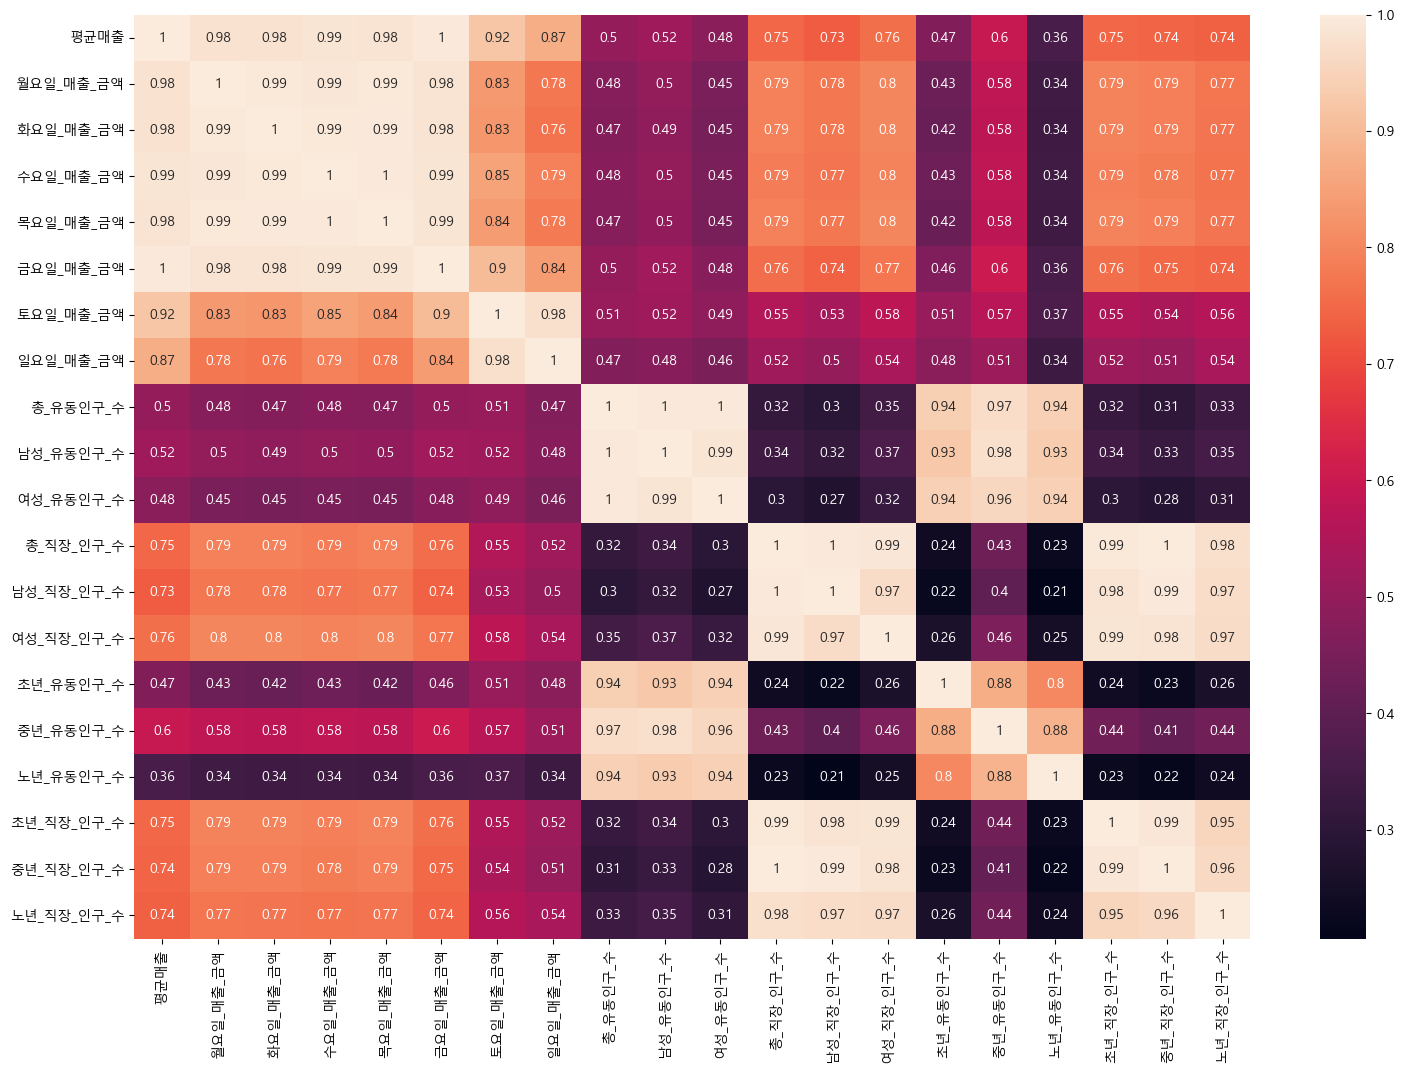

In [459]:
plt.figure(figsize=(18, 12))
sns.heatmap(restaurant_numeric.corr().abs(), annot=True)
plt.show()

In [460]:
restaurant_filtered_data.to_csv("../data/서울시_요식업_데이터.csv", encoding="cp949", index=False)

## 시각화 및 분석

seoul_final_df = pd.get_dummies(seoul_final_df, columns=["상권_구분_코드_명"], drop_first=False)  
seoul_final_df.info()

In [4]:
seoul_df=pd.read_csv("../data/서울시_요식업_데이터.csv", encoding="cp949")
seoul_df

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,서비스업종,평균매출,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,...,여성_유동인구_수,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,초년_유동인구_수,중년_유동인구_수,노년_유동인구_수,초년_직장_인구_수,중년_직장_인구_수,노년_직장_인구_수
0,20241,골목상권,4.19민주묘지역 2번,요식업,5.791738e+08,7.595857e+07,6.386816e+07,8.260543e+07,5.811491e+07,8.225960e+07,...,592167.0,164.0,107.0,57.0,309395.0,285963.0,425816.0,4.0,29.0,131.0
1,20242,골목상권,4.19민주묘지역 2번,요식업,6.476178e+08,6.640149e+07,8.469500e+07,9.544292e+07,6.870253e+07,8.831480e+07,...,636828.0,164.0,107.0,57.0,345370.0,281203.0,439184.0,4.0,29.0,131.0
2,20243,골목상권,4.19민주묘지역 2번,요식업,5.785566e+08,5.557269e+07,7.413718e+07,7.940513e+07,5.871730e+07,7.947643e+07,...,575040.0,164.0,107.0,57.0,284759.0,274230.0,422935.0,4.0,29.0,131.0
3,20244,골목상권,4.19민주묘지역 2번,요식업,4.837946e+08,4.671709e+07,7.365159e+07,7.410768e+07,4.735737e+07,5.921922e+07,...,575067.0,239.0,155.0,84.0,295155.0,261708.0,394544.0,5.0,42.0,192.0
4,20241,발달상권,63빌딩,요식업,1.214889e+09,1.718305e+08,1.981513e+08,2.013047e+08,2.035040e+08,1.777674e+08,...,30233.0,8016.0,5688.0,2328.0,14542.0,24672.0,22923.0,1492.0,4934.0,1590.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5910,20244,골목상권,흑리단길,요식업,4.471095e+08,5.694142e+07,7.229898e+07,6.317090e+07,5.951992e+07,7.513741e+07,...,89843.0,22.0,14.0,8.0,52809.0,49233.0,63713.0,0.0,13.0,9.0
5911,20241,전통시장,흑석시장,요식업,2.768305e+08,4.012902e+07,4.407540e+07,4.829691e+07,4.976233e+07,4.734645e+07,...,45268.0,1.0,1.0,0.0,28248.0,25419.0,31037.0,0.0,1.0,0.0
5912,20242,전통시장,흑석시장,요식업,4.008547e+08,7.667108e+07,6.577886e+07,6.997424e+07,7.328599e+07,6.259257e+07,...,46613.0,1.0,1.0,0.0,29745.0,25491.0,30606.0,0.0,1.0,0.0
5913,20243,전통시장,흑석시장,요식업,3.245011e+08,5.180170e+07,4.784433e+07,5.132454e+07,6.179132e+07,5.683618e+07,...,39452.0,1.0,1.0,0.0,23998.0,22179.0,26710.0,0.0,1.0,0.0


In [5]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5915 entries, 0 to 5914
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준_년분기_코드   5915 non-null   int64  
 1   상권_구분_코드_명  5915 non-null   object 
 2   상권_코드_명     5915 non-null   object 
 3   서비스업종       5915 non-null   object 
 4   평균매출        5915 non-null   float64
 5   월요일_매출_금액   5915 non-null   float64
 6   화요일_매출_금액   5915 non-null   float64
 7   수요일_매출_금액   5915 non-null   float64
 8   목요일_매출_금액   5915 non-null   float64
 9   금요일_매출_금액   5915 non-null   float64
 10  토요일_매출_금액   5915 non-null   float64
 11  일요일_매출_금액   5915 non-null   float64
 12  총_유동인구_수    5915 non-null   float64
 13  남성_유동인구_수   5915 non-null   float64
 14  여성_유동인구_수   5915 non-null   float64
 15  총_직장_인구_수   5915 non-null   float64
 16  남성_직장_인구_수  5915 non-null   float64
 17  여성_직장_인구_수  5915 non-null   float64
 18  초년_유동인구_수   5915 non-null   float64
 19  중년_유동인구_수   5915 non-null  

In [6]:
seoul_df["기준_년분기_코드"]=seoul_df["기준_년분기_코드"].astype("str")
seoul_df.describe().T

,count,mean,std,min,25%,50%,75%,max
평균매출,5915.0,6.709910e+08,1.154353e+09,142495.0,1.727753e+08,3.506407e+08,6.727847e+08,1.964679e+10
월요일_매출_금액,5915.0,8.682840e+07,1.583718e+08,0.0,2.086961e+07,4.331082e+07,8.845654e+07,2.994927e+09
화요일_매출_금액,5915.0,9.572184e+07,1.765173e+08,0.0,2.362564e+07,4.789077e+07,9.489931e+07,3.278988e+09
수요일_매출_금액,5915.0,9.674554e+07,1.757890e+08,0.0,2.379729e+07,4.836944e+07,9.559192e+07,3.070113e+09
목요일_매출_금액,5915.0,9.924329e+07,1.851290e+08,0.0,2.406777e+07,4.884426e+07,9.771408e+07,3.194430e+09
금요일_매출_금액,5915.0,1.093292e+08,1.950043e+08,0.0,2.727346e+07,5.525976e+07,1.082157e+08,3.455566e+09
토요일_매출_금액,5915.0,1.054993e+08,1.783195e+08,0.0,2.577434e+07,5.503145e+07,1.121020e+08,2.285705e+09
일요일_매출_금액,5915.0,7.762345e+07,1.288229e+08,0.0,1.645034e+07,4.077456e+07,8.632923e+07,1.541997e+09
총_유동인구_수,5915.0,8.868644e+05,9.034888e+05,4.0,2.758435e+05,6.320570e+05,1.228710e+06,8.484242e+06
남성_유동인구_수,5915.0,4.213396e+05,4.365322e+05,0.0,1.318555e+05,2.981450e+05,5.786575e+05,4.496772e+06


In [7]:
seoul_df_corr=seoul_df.select_dtypes(["float64", "int64"]).corr()
seoul_df_corr_sort=seoul_df_corr["평균매출"].abs().sort_values(ascending=False)
seoul_df_corr_sort

평균매출          1.000000
금요일_매출_금액     0.995370
수요일_매출_금액     0.986344
목요일_매출_금액     0.983648
월요일_매출_금액     0.980316
화요일_매출_금액     0.978897
토요일_매출_금액     0.921002
일요일_매출_금액     0.873152
여성_직장_인구_수    0.761112
초년_직장_인구_수    0.748436
총_직장_인구_수     0.747404
중년_직장_인구_수    0.740826
노년_직장_인구_수    0.735186
남성_직장_인구_수    0.730131
중년_유동인구_수     0.595130
남성_유동인구_수     0.522115
총_유동인구_수      0.501838
여성_유동인구_수     0.479396
초년_유동인구_수     0.465821
노년_유동인구_수     0.359438
Name: 평균매출, dtype: float64

In [9]:
seoul_df.columns

Index(['기준_년분기_코드', '상권_구분_코드_명', '상권_코드_명', '서비스업종', '평균매출', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수', '총_직장_인구_수',
       '남성_직장_인구_수', '여성_직장_인구_수', '초년_유동인구_수', '중년_유동인구_수', '노년_유동인구_수',
       '초년_직장_인구_수', '중년_직장_인구_수', '노년_직장_인구_수'],
      dtype='object')

In [10]:
col2 = ["기준_년분기_코드", "상권_구분_코드_명", "총_유동인구_수", "남성_유동인구_수", "여성_유동인구_수",
        "총_직장_인구_수", "남성_직장_인구_수", "여성_직장_인구_수", "초년_유동인구_수",
        "중년_유동인구_수", "노년_유동인구_수", "초년_직장_인구_수", "중년_직장_인구_수", "노년_직장_인구_수"]

## 모델 학습 및 평가

선형회귀, 폴리노멀, 릿지, 라쏘, 엘라스틱넷, KNR -> 정규화 진행 필요  
디시전트리, 랜덤포레스트 정규화 안해줘도 됨  

### X, Y 값 선택

In [11]:
X = seoul_df[col2]
Y = seoul_df["평균매출"]

print(X.shape, type(X))
print(Y.shape, type(Y))

(5915, 14) <class 'pandas.core.frame.DataFrame'>
(5915,) <class 'pandas.core.series.Series'>


In [12]:
Y.describe()

count    5.915000e+03
mean     6.709910e+08
std      1.154353e+09
min      1.424950e+05
25%      1.727753e+08
50%      3.506407e+08
75%      6.727847e+08
max      1.964679e+10
Name: 평균매출, dtype: float64

In [13]:
y_log = np.log1p(Y)
y_log.describe()

count    5915.000000
mean       19.617163
std         1.227249
min        11.867069
25%        18.967502
50%        19.675273
75%        20.326936
max        23.701180
Name: 평균매출, dtype: float64

### LinearRegg

> 훈련, 테스트 데이터 나누기

In [47]:
X_train, X_test, Y_train_log, Y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
X_train.shape, Y_train_log.shape, X_test.shape, Y_test_log.shape

((4732, 14), (4732,), (1183, 14), (1183,))

In [48]:
X_train_encoded = pd.get_dummies(X_train['상권_구분_코드_명'], prefix='상권_구분_코드_명')
X_test_encoded = pd.get_dummies(X_test['상권_구분_코드_명'], prefix='상권_구분_코드_명')
X_train = X_train.drop(columns=['상권_구분_코드_명']).join(X_train_encoded)
X_test = X_test.drop(columns=['상권_구분_코드_명']).join(X_test_encoded)

X_train_encoded = pd.get_dummies(X_train['기준_년분기_코드'], prefix='기준_년분기_코드')
X_test_encoded = pd.get_dummies(X_test['기준_년분기_코드'], prefix='기준_년분기_코드')
X_train = X_train.drop(columns=['기준_년분기_코드']).join(X_train_encoded)
X_test = X_test.drop(columns=['기준_년분기_코드']).join(X_test_encoded)

In [49]:
X_train.shape, Y_train_log.shape, X_test.shape, Y_test_log.shape

((4732, 20), (4732,), (1183, 20), (1183,))

In [50]:
X_train.columns

Index(['총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수', '총_직장_인구_수', '남성_직장_인구_수',
       '여성_직장_인구_수', '초년_유동인구_수', '중년_유동인구_수', '노년_유동인구_수', '초년_직장_인구_수',
       '중년_직장_인구_수', '노년_직장_인구_수', '상권_구분_코드_명_골목상권', '상권_구분_코드_명_관광특구',
       '상권_구분_코드_명_발달상권', '상권_구분_코드_명_전통시장', '기준_년분기_코드_20241',
       '기준_년분기_코드_20242', '기준_년분기_코드_20243', '기준_년분기_코드_20244'],
      dtype='object')

In [40]:
from smote_variants import SMOTE

smote = SMOTE(random_state=42)
X_train_over, Y_train_over = smote.fit_resample(X_train, Y_train_log)
print(X_train_over.shape, Y_train_over.shape)

2025-04-02 00:13:22,729:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': 42, 'class_name': 'SMOTE'}")
2025-04-02 00:13:22,732:INFO:SMOTE: Too few minority samples for sampling


(4732, 20) (4732,)


In [53]:
X_train['상권_구분_코드_명_관광특구'].value_counts()

상권_구분_코드_명_관광특구
False    4714
True       18
Name: count, dtype: int64

In [29]:
from smote_variants import SMOTE

# 관광특구 훈련 데이터에서만 SMOTE 적용
tourism_idx = X_train[X_train['상권_구분_코드_명_관광특구'] == 1].index

# SMOTE 변형 적용
smote = SMOTE(random_state=42)
X_train_over, Y_train_over = smote.fit_resample(X_train.loc[tourism_idx], Y_train_log.loc[tourism_idx])  

print(X_train_over.shape, Y_train_over.shape)

2025-04-01 23:59:06,877:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': 42, 'class_name': 'SMOTE'}")
2025-04-01 23:59:06,878:INFO:SMOTE: Too few minority samples for sampling


(18, 20) (18,)


> 스케일링

In [54]:
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

> 모델 학습

In [55]:
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train_log)

LinearRegression()

> 성능 평가

In [56]:
print("학습: ", lr.score(X_train_scaled, Y_train_log))
print("일반화: ", lr.score(X_test_scaled, Y_test_log))

학습:  0.37163388117229346
일반화:  0.3291376837928498


> 평가지표  

In [57]:
def regg_eval(model):
    Y_train_pred_log=model.predict(X_train_scaled)
    Y_train_pred=np.expm1(Y_train_pred_log)
    Y_test_pred_log=model.predict(X_test_scaled)
    Y_test_pred=np.expm1(Y_test_pred_log)
    
    print("학습 R2: ", r2_score(np.expm1(Y_train_log), Y_train_pred))
    print("일반화 R2:", r2_score(np.expm1(Y_test_log), Y_test_pred), "\n")

    print("학습 MAE:", mean_absolute_error(np.expm1(Y_train_log), Y_train_pred))
    print("일반화 MAE:", mean_absolute_error(np.expm1(Y_test_log), Y_test_pred), "\n")

    print("학습 MSE:", mean_squared_error(np.expm1(Y_train_log), Y_train_pred))
    print("일반화 MSE:", mean_squared_error(np.expm1(Y_test_log), Y_test_pred), "\n")

    print("학습 RMSE:", root_mean_squared_error(np.expm1(Y_train_log), Y_train_pred))
    print("일반화 RMSE:", root_mean_squared_error(np.expm1(Y_test_log), Y_test_pred), "\n")

In [58]:
regg_eval(lr)

학습 R2:  -2.348295925832454
일반화 R2: 0.462961278215443 

학습 MAE: 427844941.099363
일반화 MAE: 359728106.87979317 

학습 MSE: 4.639517742884919e+18
일반화 MSE: 6.009354396875512e+17 

학습 RMSE: 2153953978.822417
일반화 RMSE: 775200257.7963653 



### PolynomialRegg

> 훈련, 테스트 데이터 나누기

In [62]:
X_train, X_test, Y_train_log, Y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [63]:
X_train_encoded = pd.get_dummies(X_train['상권_구분_코드_명'], prefix='상권_구분_코드_명')
X_test_encoded = pd.get_dummies(X_test['상권_구분_코드_명'], prefix='상권_구분_코드_명')
X_train = X_train.drop(columns=['상권_구분_코드_명']).join(X_train_encoded)
X_test = X_test.drop(columns=['상권_구분_코드_명']).join(X_test_encoded)

X_train_encoded = pd.get_dummies(X_train['기준_년분기_코드'], prefix='기준_년분기_코드')
X_test_encoded = pd.get_dummies(X_test['기준_년분기_코드'], prefix='기준_년분기_코드')
X_train = X_train.drop(columns=['기준_년분기_코드']).join(X_train_encoded)
X_test = X_test.drop(columns=['기준_년분기_코드']).join(X_test_encoded)

> 다항식 변환

In [64]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(X_train)

PolynomialFeatures(include_bias=False)

이렇게 fit을 통해 학습을 시켜서 다항식 차수에 따라 변환할 특성들을 결정했고,  
transform을 통해 데이터를 실제로 다항식 특성을 변환하면,  

In [65]:
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

> 스케일링

In [66]:
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train_poly)
X_test_scaled = scaler_x.transform(X_test_poly)

> 모델 학습

In [67]:
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train_log)

LinearRegression()

> 성능 평가

In [68]:
print("학습: ", lr.score(X_train_scaled, Y_train_log))
print("일반화: ", lr.score(X_test_scaled, Y_test_log))

학습:  0.4181385745654299
일반화:  -146.04538505933982


> 평가지표

In [69]:
regg_eval(lr)

학습 R2:  0.7781509596901223
일반화 R2: -1.5862628040412966e+275 

학습 MAE: 303498163.18409646
일반화 MAE: 1.2296966143775597e+145 

학습 MSE: 3.0740190877954477e+17
일반화 MSE: 1.77499591172678e+293 

학습 RMSE: 554438372.3909671
일반화 RMSE: 4.213070034697714e+146 



### Ridge, Lasso, ElasticNet

In [70]:
ridge = Ridge()  # default: 1.0
ridge.fit(X_train_scaled, Y_train_log)
print("Ridge 학습: ", ridge.score(X_train_scaled, Y_train_log))
print("Ridge 일반화: ", ridge.score(X_test_scaled, Y_test_log))

Ridge 학습:  0.4126075149407371
Ridge 일반화:  0.3694332484921353


In [71]:
regg_eval(ridge)

학습 R2:  0.788810050280269
일반화 R2: 0.6568258041997912 

학습 MAE: 300755610.90920305
일반화 MAE: 329223939.2958948 

학습 MSE: 2.9263229432149523e+17
일반화 MSE: 3.8400496626638304e+17 

학습 RMSE: 540954983.6368043
일반화 RMSE: 619681342.5191879 



In [72]:
lasso=Lasso()
lasso.fit(X_train_scaled, Y_train_log)
print("Lasso 학습: ", lasso.score(X_train_scaled, Y_train_log))
print("Lasso 일반화: ", lasso.score(X_test_scaled, Y_test_log))

Lasso 학습:  0.0
Lasso 일반화:  -0.00037380080549764827


In [73]:
regg_eval(lasso)

학습 R2:  -0.08408201184564401
일반화 R2: -0.1054197008455664 

학습 MAE: 500520947.84273154
일반화 MAE: 494756939.55183995 

학습 MSE: 1.502142534623722e+18
일반화 MSE: 1.2369422297139354e+18 

학습 RMSE: 1225619245.3709764
일반화 RMSE: 1112179045.7088892 



In [74]:
elastic_net=ElasticNet()  
elastic_net.fit(X_train_scaled, Y_train_log)
print("ElasticNet 학습: ", elastic_net.score(X_train_scaled, Y_train_log))
print("ElasticNet 일반화: ", elastic_net.score(X_test_scaled, Y_test_log))

ElasticNet 학습:  0.08097303002307965
ElasticNet 일반화:  0.0669091804007157


In [75]:
regg_eval(elastic_net)

학습 R2:  -0.04837803825907416
일반화 R2: -0.06868815970204878 

학습 MAE: 486598707.45385486
일반화 MAE: 482458876.28238475 

학습 MSE: 1.4526698408667622e+18
일반화 MSE: 1.1958403800109335e+18 

학습 RMSE: 1205267539.1243067
일반화 RMSE: 1093544868.7689652 



### 모델 최적화  
> 교차 검증

Ridge 5-fold

In [76]:
val_data = cross_validate(ridge, X_train_scaled, Y_train_log, cv=5)
val_data

{'fit_time': array([0.14545989, 0.03247762, 0.02792478, 0.04188752, 0.03291202]),
 'score_time': array([0.00399089, 0.00398874, 0.00498819, 0.0039885 , 0.0039897 ]),
 'test_score': array([0.38613669, 0.43131686, 0.38673015, 0.39130785, 0.39916423])}

In [77]:
print("학습: ", ridge.score(X_train_scaled, Y_train_log))
print("검증: ", val_data["test_score"].mean())  # 교차 검증 성능의 평균  
print("일반화: ", ridge.score(X_test_scaled, Y_test_log))

학습:  0.4126075149407371
검증:  0.3989311575397685
일반화:  0.3694332484921353


In [78]:
scores = cross_validate(ridge, X_train_scaled, Y_train_log, cv=5, n_jobs=-1, return_train_score=True)

print("각 fold 훈련 정확도: ", scores["train_score"])
print("훈련 평균: ", scores["train_score"].mean(), "\n")

print("각 fold 검증 정확도: ", scores["test_score"])
print("검증 평균: ", scores["test_score"].mean())

각 fold 훈련 정확도:  [0.41645143 0.4051125  0.41692808 0.41591906 0.41418139]
훈련 평균:  0.41371849383583753 

각 fold 검증 정확도:  [0.38613669 0.43131686 0.38673015 0.39130785 0.39916423]
검증 평균:  0.3989311575397682


이번에는 7-fold 교차검증

In [79]:
scores = cross_validate(ridge, X_train_scaled, Y_train_log, cv=7, n_jobs=-1, return_train_score=True)

print("각 fold 훈련 정확도: ", scores["train_score"])
print("훈련 평균: ", scores["train_score"].mean(), "\n")

print("각 fold 검증 정확도: ", scores["test_score"])
print("검증 평균: ", scores["test_score"].mean())

각 fold 훈련 정확도:  [0.41528532 0.41034173 0.4081034  0.41519249 0.41334962 0.41323928
 0.41734751]
훈련 평균:  0.41326562216209994 

각 fold 검증 정확도:  [0.38398076 0.41880555 0.43111027 0.3899776  0.40090286 0.4010323
 0.3760604 ]
검증 평균:  0.4002671057838025


In [80]:
print("[ Ridge ] ------------------------------------------------------")
ridge_scores = cross_validate(ridge, X_train_scaled, Y_train_log, cv=5, n_jobs=-1, return_train_score=True)
print("Ridge 각 fold 훈련 정확도: ", ridge_scores["train_score"])
print("Ridge 훈련 평균: ", ridge_scores["train_score"].mean(), "\n")
print("Ridge 각 fold 검증 정확도: ", ridge_scores["test_score"])
print("Ridge 검증 평균: ", ridge_scores["test_score"].mean(), "\n")

print("[ Lasso ] ------------------------------------------------------")
lasso_scores = cross_validate(lasso, X_train_scaled, Y_train_log, cv=5, n_jobs=-1, return_train_score=True)
print("Lasso 각 fold 훈련 정확도: ", lasso_scores["train_score"])
print("Lasso 훈련 평균: ", lasso_scores["train_score"].mean(), "\n")
print("Lasso 각 fold 검증 정확도: ", lasso_scores["test_score"])
print("Lasso 검증 평균: ", lasso_scores["test_score"].mean(), "\n")

print("[ ElasticNet ] ------------------------------------------------------")
elastic_net_scores = cross_validate(elastic_net, X_train_scaled, Y_train_log, cv=5, n_jobs=-1, return_train_score=True)
print("ElasticNet 각 fold 훈련 정확도: ", elastic_net_scores["train_score"])
print("ElasticNet 훈련 평균: ", elastic_net_scores["train_score"].mean(), "\n")
print("ElasticNet 각 fold 검증 정확도: ", elastic_net_scores["test_score"])
print("ElasticNet 검증 평균: ", elastic_net_scores["test_score"].mean(), "\n")

[ Ridge ] ------------------------------------------------------
Ridge 각 fold 훈련 정확도:  [0.41645143 0.4051125  0.41692808 0.41591906 0.41418139]
Ridge 훈련 평균:  0.41371849383583753 

Ridge 각 fold 검증 정확도:  [0.38613669 0.43131686 0.38673015 0.39130785 0.39916423]
Ridge 검증 평균:  0.3989311575397682 

[ Lasso ] ------------------------------------------------------
Lasso 각 fold 훈련 정확도:  [0. 0. 0. 0. 0.]
Lasso 훈련 평균:  0.0 

Lasso 각 fold 검증 정확도:  [-0.00017818 -0.0015119  -0.00160434 -0.00099767 -0.00032756]
Lasso 검증 평균:  -0.0009239299606285556 

[ ElasticNet ] ------------------------------------------------------
ElasticNet 각 fold 훈련 정확도:  [0.07753761 0.06777459 0.08318305 0.08789002 0.08844868]
ElasticNet 훈련 평균:  0.0809667885768958 

ElasticNet 각 fold 검증 정확도:  [0.07773058 0.06944398 0.07905398 0.08375578 0.08729803]
ElasticNet 검증 평균:  0.0794564672007381 



> 하이파라미터 튜닝

In [81]:
ridge = Ridge()

params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

gs = GridSearchCV(ridge, params, cv=5, n_jobs=-1)
gs.fit(X_train_scaled, Y_train_log)

print("최적 alpha 값: ", gs.best_params_)
print("최적 검증 점수: ", gs.best_score_)

최적 alpha 값:  {'alpha': 0.1}
최적 검증 점수:  0.4001302516330799


그리고 이를 이용해 최적의 값으로 학습하면  

In [82]:
best_ridge = Ridge(alpha=gs.best_params_["alpha"])
best_ridge.fit(X_train_scaled, Y_train_log)

print("학습 점수:", best_ridge.score(X_train_scaled, Y_train_log))
print("일반화 점수:", best_ridge.score(X_test_scaled, Y_test_log))

학습 점수: 0.41411816446290073
일반화 점수: 0.36924244860105326


> 평가지표

In [83]:
regg_eval(best_ridge)

학습 R2:  0.7888434805755964
일반화 R2: 0.5038421307203782 

학습 MAE: 300970989.69087267
일반화 MAE: 344209247.97125936 

학습 MSE: 2.9258597211707923e+17
일반화 MSE: 5.551905947102265e+17 

학습 RMSE: 540912166.7304953
일반화 RMSE: 745111129.1010399 



### KNR

In [85]:
X_train, X_test, Y_train_log, Y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [86]:
X_train_encoded = pd.get_dummies(X_train['상권_구분_코드_명'], prefix='상권_구분_코드_명')
X_test_encoded = pd.get_dummies(X_test['상권_구분_코드_명'], prefix='상권_구분_코드_명')
X_train = X_train.drop(columns=['상권_구분_코드_명']).join(X_train_encoded)
X_test = X_test.drop(columns=['상권_구분_코드_명']).join(X_test_encoded)

X_train_encoded = pd.get_dummies(X_train['기준_년분기_코드'], prefix='기준_년분기_코드')
X_test_encoded = pd.get_dummies(X_test['기준_년분기_코드'], prefix='기준_년분기_코드')
X_train = X_train.drop(columns=['기준_년분기_코드']).join(X_train_encoded)
X_test = X_test.drop(columns=['기준_년분기_코드']).join(X_test_encoded)

In [87]:
scale_x=StandardScaler()
X_train_scaled=scaler_x.fit_transform(X_train)
X_test_scaled=scaler_x.transform(X_test)

In [88]:
kn=KNeighborsRegressor()
kn.fit(X_train_scaled, Y_train_log)
print("학습: ", kn.score(X_train_scaled, Y_train_log))
print("일반화: ", kn.score(X_test_scaled, Y_test_log))

학습:  0.5298874027991096
일반화:  0.2504039293138821


In [89]:
regg_eval(kn)

학습 R2:  0.8103618615212601
일반화 R2: 0.6366888714255035 

학습 MAE: 278749141.2980734
일반화 MAE: 356322505.67474246 

학습 MSE: 2.6276933929638774e+17
일반화 MSE: 4.0653778570715654e+17 

학습 RMSE: 512610319.14738876
일반화 RMSE: 637603156.9143589 



In [324]:
kn = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

gs = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, n_jobs=-1)
gs.fit(X_train_scaled, Y_train_log)

print("최적의 하이퍼파라미터: ", gs.best_params_)
print("최적 모델: ", gs.best_estimator_)

최적의 하이퍼파라미터:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
최적 모델:  KNeighborsRegressor(metric='manhattan', n_neighbors=3, weights='distance')


In [ ]:
best_kn = gs.best_estimator_

print("학습: ", best_kn.score(X_train_scaled, Y_train_log))
print("일반화: ", best_kn.score(X_test_scaled, Y_test_log))

학습:  1.0
일반화:  0.710741754858088


In [328]:
regg_eval(gs)

학습 R2:  1.0
일반화 R2: 0.9240889137259928 

학습 MAE: 0.0
일반화 MAE: 145328706.54363945 

학습 MSE: 0.0
일반화 MSE: 8.494296622717371e+16 

학습 RMSE: 0.0
일반화 RMSE: 291449766.2156786 



### DecisionTreeReg

In [90]:
X_train, X_test, Y_train_log, Y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [91]:
X_train_encoded = pd.get_dummies(X_train['상권_구분_코드_명'], prefix='상권_구분_코드_명')
X_test_encoded = pd.get_dummies(X_test['상권_구분_코드_명'], prefix='상권_구분_코드_명')
X_train = X_train.drop(columns=['상권_구분_코드_명']).join(X_train_encoded)
X_test = X_test.drop(columns=['상권_구분_코드_명']).join(X_test_encoded)

X_train_encoded = pd.get_dummies(X_train['기준_년분기_코드'], prefix='기준_년분기_코드')
X_test_encoded = pd.get_dummies(X_test['기준_년분기_코드'], prefix='기준_년분기_코드')
X_train = X_train.drop(columns=['기준_년분기_코드']).join(X_train_encoded)
X_test = X_test.drop(columns=['기준_년분기_코드']).join(X_test_encoded)

In [92]:
dt=DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, Y_train_log)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [93]:
print("학습: ", dt.score(X_train, Y_train_log))
print("일반화: ", dt.score(X_test, Y_test_log))

학습:  0.45436337030935203
일반화:  0.37359689813006036


In [94]:
dt.feature_importances_

array([0.0045737 , 0.02625367, 0.00629011, 0.02984057, 0.        ,
       0.09794878, 0.01605169, 0.10962338, 0.00176105, 0.00302233,
       0.01818023, 0.07869337, 0.        , 0.        , 0.56353901,
       0.0442221 , 0.        , 0.        , 0.        , 0.        ])

In [95]:
X_col=X_train.columns
X_col

Index(['총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수', '총_직장_인구_수', '남성_직장_인구_수',
       '여성_직장_인구_수', '초년_유동인구_수', '중년_유동인구_수', '노년_유동인구_수', '초년_직장_인구_수',
       '중년_직장_인구_수', '노년_직장_인구_수', '상권_구분_코드_명_골목상권', '상권_구분_코드_명_관광특구',
       '상권_구분_코드_명_발달상권', '상권_구분_코드_명_전통시장', '기준_년분기_코드_20241',
       '기준_년분기_코드_20242', '기준_년분기_코드_20243', '기준_년분기_코드_20244'],
      dtype='object')

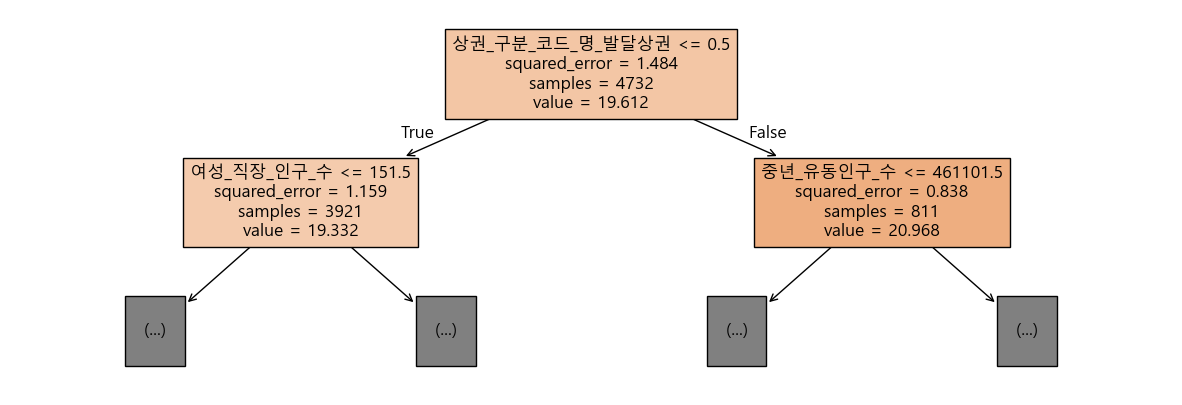

In [96]:
plt.figure(figsize=(15,5))
plot_tree(dt, max_depth=1, filled=True, feature_names=X_col)
plt.show()

In [336]:
params={
    "max_depth": np.arange(5, 30),
    "min_impurity_decrease": np.arange(0.0001, 0.0006, 0.0001),
    "min_samples_split": np.arange(2, 100, 2)
}

gs = GridSearchCV(DecisionTreeRegressor(random_state=42), params, n_jobs=-1, cv=5)
gs.fit(X_train, Y_train_log)

gs.best_params_

{'max_depth': np.int64(23),
 'min_impurity_decrease': np.float64(0.0002),
 'min_samples_split': np.int64(8)}

In [337]:
gs.best_score_

np.float64(0.4795957133113394)

In [338]:
gs_best=gs.best_estimator_

print("학습: ", gs_best.score(X_train, Y_train_log))
print("일반화: ", gs_best.score(X_test, Y_test_log))

학습:  0.9161087996023043
일반화:  0.48192141034016633


In [339]:
Y_train_pred_log = gs_best.predict(X_train)  
Y_train_pred = np.expm1(Y_train_pred_log) 
Y_test_pred_log = gs_best.predict(X_test) 
Y_test_pred = np.expm1(Y_test_pred_log) 

print("학습 R2: ", r2_score(np.expm1(Y_train_log), Y_train_pred))
print("일반화 R2:", r2_score(np.expm1(Y_test_log), Y_test_pred), "\n")

print("학습 MAE:", mean_absolute_error(np.expm1(Y_train_log), Y_train_pred))
print("일반화 MAE:", mean_absolute_error(np.expm1(Y_test_log), Y_test_pred), "\n")

print("학습 MSE:", mean_squared_error(np.expm1(Y_train_log), Y_train_pred))
print("일반화 MSE:", mean_squared_error(np.expm1(Y_test_log), Y_test_pred), "\n")

print("학습 RMSE:", np.sqrt(mean_squared_error(np.expm1(Y_train_log), Y_train_pred)))
print("일반화 RMSE:", np.sqrt(mean_squared_error(np.expm1(Y_test_log), Y_test_pred)), "\n")

학습 R2:  0.9535568678801873
일반화 R2: 0.7756405567650096 

학습 MAE: 124157702.62484424
일반화 MAE: 247230813.8780775 

학습 MSE: 6.4353253200416616e+16
일반화 MSE: 2.5105366745335142e+17 

학습 RMSE: 253679429.99072
일반화 RMSE: 501052559.57169944 



### RandomForestReg

In [97]:
X_train, X_test, Y_train_log, Y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [98]:
X_train_encoded = pd.get_dummies(X_train['상권_구분_코드_명'], prefix='상권_구분_코드_명')
X_test_encoded = pd.get_dummies(X_test['상권_구분_코드_명'], prefix='상권_구분_코드_명')
X_train = X_train.drop(columns=['상권_구분_코드_명']).join(X_train_encoded)
X_test = X_test.drop(columns=['상권_구분_코드_명']).join(X_test_encoded)

X_train_encoded = pd.get_dummies(X_train['기준_년분기_코드'], prefix='기준_년분기_코드')
X_test_encoded = pd.get_dummies(X_test['기준_년분기_코드'], prefix='기준_년분기_코드')
X_train = X_train.drop(columns=['기준_년분기_코드']).join(X_train_encoded)
X_test = X_test.drop(columns=['기준_년분기_코드']).join(X_test_encoded)

In [99]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, Y_train_log)
print("학습: ", rf.score(X_train, Y_train_log))
print("일반화: ", rf.score(X_test, Y_test_log))

학습:  0.9648299414816577
일반화:  0.7408670306497538


In [100]:
Y_train_pred_log = rf.predict(X_train) 
Y_train_pred = np.expm1(Y_train_pred_log)  
Y_test_pred_log = rf.predict(X_test)  
Y_test_pred = np.expm1(Y_test_pred_log)  

print("학습 R2: ", r2_score(np.expm1(Y_train_log), Y_train_pred))
print("일반화 R2:", r2_score(np.expm1(Y_test_log), Y_test_pred), "\n")

print("학습 MAE:", mean_absolute_error(np.expm1(Y_train_log), Y_train_pred))
print("일반화 MAE:", mean_absolute_error(np.expm1(Y_test_log), Y_test_pred), "\n")

print("학습 MSE:", mean_squared_error(np.expm1(Y_train_log), Y_train_pred))
print("일반화 MSE:", mean_squared_error(np.expm1(Y_test_log), Y_test_pred), "\n")

print("학습 RMSE:", np.sqrt(mean_squared_error(np.expm1(Y_train_log), Y_train_pred)))
print("일반화 RMSE:", np.sqrt(mean_squared_error(np.expm1(Y_test_log), Y_test_pred)), "\n")

학습 R2:  0.980608830895376
일반화 R2: 0.8885720875038722 

학습 MAE: 72534541.83824798
일반화 MAE: 182834461.97468212 

학습 MSE: 2.6869092550061144e+16
일반화 MSE: 1.2468557456493643e+17 

학습 RMSE: 163917944.56392244
일반화 RMSE: 353108445.89861685 



In [101]:
from sklearn.model_selection import cross_val_score, cross_validate

val_data=cross_validate(rf, X_train, Y_train_log, return_train_score=True, cv=5, n_jobs=-1)

val_data

{'fit_time': array([13.14064026, 12.31934834, 12.72502208, 12.33704782, 12.44373631]),
 'score_time': array([0.1023798 , 0.13798571, 0.08361244, 0.10075235, 0.07480168]),
 'test_score': array([0.65795301, 0.69731351, 0.71570127, 0.71001169, 0.71557104]),
 'train_score': array([0.95898088, 0.95727464, 0.95562566, 0.9563139 , 0.95659477])}

In [102]:
print("학습: ", rf.score(X_train, Y_train_log))
print("검증: ", val_data["test_score"].mean())
print("일반화: ", rf.score(X_test, Y_test_log))

학습:  0.9648299414816577
검증:  0.6993101035939866
일반화:  0.7408670306497538


In [103]:
val_data=cross_validate(rf, X_train, Y_train_log, return_train_score=True, cv=7, n_jobs=-1)
val_data

{'fit_time': array([13.4016552 , 13.74945092, 14.83524823, 15.1843617 , 14.39130163,
        14.55742621, 13.49479651]),
 'score_time': array([0.07694602, 0.07243514, 0.09397221, 0.0642879 , 0.07949638,
        0.06592894, 0.11097288]),
 'test_score': array([0.67631757, 0.7420432 , 0.68658043, 0.71505968, 0.71725408,
        0.72277334, 0.71692213]),
 'train_score': array([0.96166227, 0.95945329, 0.96097296, 0.95886042, 0.95804267,
        0.96019839, 0.9588104 ])}

In [104]:
print("각 fold의 훈련 정확도: ", val_data["train_score"])
print("훈련 평균: ", val_data["train_score"].mean())
print()
print("각 fold의 검증 정확도: ", val_data["test_score"])
print("검증 평균: ", val_data["test_score"].mean())

각 fold의 훈련 정확도:  [0.96166227 0.95945329 0.96097296 0.95886042 0.95804267 0.96019839
 0.9588104 ]
훈련 평균:  0.9597143433275868

각 fold의 검증 정확도:  [0.67631757 0.7420432  0.68658043 0.71505968 0.71725408 0.72277334
 0.71692213]
검증 평균:  0.7109929172362467


In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gs = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1)

gs.fit(X_train, Y_train_log)

print("최적 params:", gs.best_params_)

gs_best = gs.best_estimator_

최적 params: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [106]:
Y_train_pred_log = gs_best.predict(X_train)
Y_train_pred = np.expm1(Y_train_pred_log)
Y_test_pred_log = gs_best.predict(X_test)
Y_test_pred = np.expm1(Y_test_pred_log)

print("학습 R2: ", r2_score(np.expm1(Y_train_log), Y_train_pred))
print("일반화 R2:", r2_score(np.expm1(Y_test_log), Y_test_pred), "\n")

print("학습 MAE:", mean_absolute_error(np.expm1(Y_train_log), Y_train_pred))
print("일반화 MAE:", mean_absolute_error(np.expm1(Y_test_log), Y_test_pred), "\n")

print("학습 MSE:", mean_squared_error(np.expm1(Y_train_log), Y_train_pred))
print("일반화 MSE:", mean_squared_error(np.expm1(Y_test_log), Y_test_pred), "\n")

print("학습 RMSE:", np.sqrt(mean_squared_error(np.expm1(Y_train_log), Y_train_pred)))
print("일반화 RMSE:", np.sqrt(mean_squared_error(np.expm1(Y_test_log), Y_test_pred)), "\n")

학습 R2:  0.9808274704363431
일반화 R2: 0.8860142508380289 

학습 MAE: 71880625.27019288
일반화 MAE: 182821331.00744948 

학습 MSE: 2.6566137837549856e+16
일반화 MSE: 1.2754774192659293e+17 

학습 RMSE: 162991220.12412158
일반화 RMSE: 357138267.2391646 



In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [80, 100, 150, 200],
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gs = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1)

gs.fit(X_train, Y_train_log)

print("최적 params:", gs.best_params_)

gs_best = gs.best_estimator_

Y_train_pred_log = gs_best.predict(X_train)
Y_train_pred = np.expm1(Y_train_pred_log)
Y_test_pred_log = gs_best.predict(X_test)
Y_test_pred = np.expm1(Y_test_pred_log)

print("학습 R2: ", r2_score(np.expm1(Y_train_log), Y_train_pred))
print("일반화 R2:", r2_score(np.expm1(Y_test_log), Y_test_pred), "\n")

print("학습 MAE:", mean_absolute_error(np.expm1(Y_train_log), Y_train_pred))
print("일반화 MAE:", mean_absolute_error(np.expm1(Y_test_log), Y_test_pred), "\n")

print("학습 MSE:", mean_squared_error(np.expm1(Y_train_log), Y_train_pred))
print("일반화 MSE:", mean_squared_error(np.expm1(Y_test_log), Y_test_pred), "\n")

print("학습 RMSE:", np.sqrt(mean_squared_error(np.expm1(Y_train_log), Y_train_pred)))
print("일반화 RMSE:", np.sqrt(mean_squared_error(np.expm1(Y_test_log), Y_test_pred)), "\n")

최적 params: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
학습 R2:  0.9703403248475846
일반화 R2: 0.8763365596795392 

학습 MAE: 109077477.6630572
일반화 MAE: 200684112.70973042 

학습 MSE: 4.1097499195392184e+16
일반화 MSE: 1.3837688209019632e+17 

학습 RMSE: 202725181.45359296
일반화 RMSE: 371990432.7939044 



----------------------------------------------------------------

In [110]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, Y_train_log)

y_pred_xgb = xgb.predict(X_test)

Y_train_pred_log = xgb.predict(X_train)
Y_train_pred = np.expm1(Y_train_pred_log)
Y_test_pred_log = xgb.predict(X_test)
Y_test_pred = np.expm1(Y_test_pred_log)

print("학습 R2: ", r2_score(np.expm1(Y_train_log), Y_train_pred))
print("일반화 R2:", r2_score(np.expm1(Y_test_log), Y_test_pred), "\n")

print("학습 MAE:", mean_absolute_error(np.expm1(Y_train_log), Y_train_pred))
print("일반화 MAE:", mean_absolute_error(np.expm1(Y_test_log), Y_test_pred), "\n")

print("학습 MSE:", mean_squared_error(np.expm1(Y_train_log), Y_train_pred))
print("일반화 MSE:", mean_squared_error(np.expm1(Y_test_log), Y_test_pred), "\n")

print("학습 RMSE:", np.sqrt(mean_squared_error(np.expm1(Y_train_log), Y_train_pred)))
print("일반화 RMSE:", np.sqrt(mean_squared_error(np.expm1(Y_test_log), Y_test_pred)), "\n")

학습 R2:  0.976525734393078
일반화 R2: 0.8605450077524799 

학습 MAE: 89681704.50207128
일반화 MAE: 204158554.93394214 

학습 MSE: 3.2526776066673596e+16
일반화 MSE: 1.560473084778919e+17 

학습 RMSE: 180351811.930664
일반화 RMSE: 395028237.57029307 

